In [225]:
import pandas as pd
import pandas_profiling
import pickle
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
emp_df = pd.read_csv('HR_comma_sep 2.csv')
emp_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [242]:
emp_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [279]:
emp_df = emp_df.rename(index=str, columns={'average_montly_hours': 'average_monthly_hours'})

In [243]:
emp_df.shape

(14999, 10)

In [244]:
emp_df.columns = emp_df.columns.str.strip()

In [247]:
pandas_profiling.ProfileReport(emp_df)

Number of variables,10
Number of observations,14999
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,80.0 B
Numeric,5
Categorical,2
Boolean,3
Date,0
Text (Unique),0
Rejected,0


### Baseline model 
- Dropped 'sales' and 'salary' as they are currently strings

In [250]:
from sklearn.linear_model import LogisticRegression

In [251]:
from sklearn.model_selection import train_test_split

In [252]:
y = emp_df['left']
X = emp_df.drop(columns=['left', 'sales', 'salary'])

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [254]:
lr = LogisticRegression()

In [255]:
lr.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [256]:
lr.score(X_test, y_test)

0.757

In [257]:
from sklearn.metrics import f1_score

In [258]:
y_pred = lr.predict(X_test)

In [259]:
f1_score(y_test, y_pred)

0.3063748810656518

Converting Sales and Salary columns to numeric data

In [260]:
emp_df.groupby('sales').nunique()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
sales,,,,,,,,,,
IT,90,64,6,195,8,2,2,2,1,3
RandD,90,65,6,175,6,2,2,2,1,3
accounting,90,64,6,178,7,2,2,2,1,3
hr,90,63,6,176,6,2,2,2,1,3
management,86,62,6,163,8,2,2,2,1,3
marketing,90,64,6,181,8,2,2,2,1,3
product_mng,88,65,6,182,8,2,2,1,1,3
sales,92,65,6,214,8,2,2,2,1,3
support,92,65,6,204,7,2,2,2,1,3


In [261]:
emp_df['salary'] = emp_df['salary'].map( {'high':3 ,'medium': 2, 'low': 1} ).astype(int)

In [262]:
emp_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [263]:
dummy = pd.get_dummies(emp_df['sales'])

In [264]:
emp_df = pd.concat([emp_df, dummy], axis=1)

In [265]:
emp_df = emp_df.drop(['sales'], axis=1)

In [266]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 18 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
salary                   14999 non-null int64
IT                       14999 non-null uint8
RandD                    14999 non-null uint8
accounting               14999 non-null uint8
hr                       14999 non-null uint8
management               14999 non-null uint8
marketing                14999 non-null uint8
product_mng              14999 non-null uint8
support                  14999 non-null uint8
technical                14999 non-null uint8
dtypes: float64(2), int64(7), uint8(9)
memory usage: 1.2 MB

In [267]:
emp_df = emp_df.drop(columns=['left']).assign(left=emp_df['left'])

In [268]:
%matplotlib inline

In [269]:
sns.set(style='white')

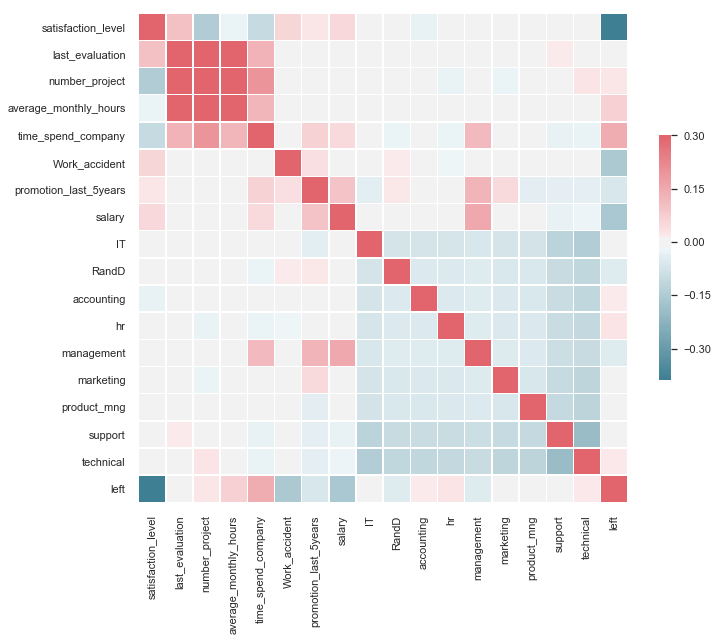

In [307]:
corr = emp_df.corr()
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, cbar_kws={'shrink': .5}, 
           linewidths=.5)

Correlation matrix findings
- average monthly hours, time spent at company = positively correlated with leaving
- satisfaction level, work accident, salary = negatively correlated with leaving

In [283]:
# average monthly hours Vs leaving

hours = emp_df[['left', 'average_monthly_hours']].groupby(['left'], as_index=False).mean().sort_values(by='average_monthly_hours', ascending=False)
hours

,left,average_monthly_hours
1,1,207.419210
0,0,199.060203


In [297]:
# average years at company Vs leaving

years1 = emp_df[['left', 'time_spend_company']].groupby(['left'], as_index=False).mean().sort_values(by='time_spend_company', ascending=False)
years2 = emp_df[['left', 'time_spend_company']].groupby(['time_spend_company'], as_index=False).mean().sort_values(by='left', ascending=False)

In [298]:
years1

,left,time_spend_company
1,1,3.876505
0,0,3.380032


In [299]:
years2

,time_spend_company,left
3,5,0.565513
2,4,0.348064
4,6,0.291086
1,3,0.246159
0,2,0.016338
5,7,0.000000
6,8,0.000000
7,10,0.000000


In [287]:
# average satisfaction Vs leaving

satisfaction = emp_df[['left', 'satisfaction_level']].groupby(['left'], as_index=False).mean().sort_values(by='satisfaction_level', ascending=False)
satisfaction

,left,satisfaction_level
0,0,0.666810
1,1,0.440098


In [294]:
#average salary Vs leaving

salary1 = emp_df[['left', 'salary']].groupby(['left'], as_index=False).mean().sort_values(by='salary', ascending=False)
salary2 = emp_df[['left', 'salary']].groupby(['salary'], as_index=False).mean().sort_values(by='left', ascending=False)

In [295]:
salary1

,left,salary
0,0,1.650945
1,1,1.414730


In [296]:
salary2

,salary,left
0,1,0.296884
1,2,0.204313
2,3,0.066289


In [305]:
#average work accident Vs leaving

accident1 = emp_df[['left', 'Work_accident']].groupby(['left'], as_index=False).mean().sort_values(by='Work_accident', ascending=False)
accident2 = emp_df[['left', 'Work_accident']].groupby(['Work_accident'], as_index=False).mean().sort_values(by='left', ascending=False)

In [303]:
accident1

,left,Work_accident
0,0,0.175009
1,1,0.047326


In [304]:
accident2

,Work_accident,left
0,0,0.265160
1,1,0.077916


In [308]:
from scipy import stats

In [309]:
stats.ttest_ind(emp_df.last_evaluation, emp_df.number_project)

Ttest_indResult(statistic=-303.8042100031241, pvalue=0.0)

In [310]:
stats.ttest_ind(emp_df.last_evaluation, emp_df.average_monthly_hours)

Ttest_indResult(statistic=-491.25647025928, pvalue=0.0)

In [311]:
stats.ttest_ind(emp_df.number_project, emp_df.average_monthly_hours)

Ttest_indResult(statistic=-483.54229603425085, pvalue=0.0)

Correlations of these 3 variables are statistically significant therefore create interaction term

In [312]:
emp_df['project_hours_eval'] = emp_df['last_evaluation']*emp_df['number_project']*emp_df['average_monthly_hours']

In [313]:
emp_df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,support,technical,left,project_hours_eval
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,0,0,0,1,166.42
1,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,0,0,0,1,1126.60
2,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,0,0,0,1,1675.52
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,0,0,0,1,970.05
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,0,0,0,1,165.36
5,0.41,0.50,2,153,3,0,0,1,0,0,0,0,0,0,0,0,0,1,153.00
6,0.10,0.77,6,247,4,0,0,1,0,0,0,0,0,0,0,0,0,1,1141.14
7,0.92,0.85,5,259,5,0,0,1,0,0,0,0,0,0,0,0,0,1,1100.75
8,0.89,1.00,5,224,5,0,0,1,0,0,0,0,0,0,0,0,0,1,1120.00
9,0.42,0.53,2,142,3,0,0,1,0,0,0,0,0,0,0,0,0,1,150.52
